# Exploratory Data Analysis ( EDA ) House Prices 

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [136]:
data = pd.read_csv('/Users/reemyalfaisal/Downloads/cleaned_data.csv')

In [138]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
1,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
2,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
3,9800000,5750,3,2,4,1,1,0,0,1,1,1,2
4,9800000,13200,3,1,2,1,0,1,0,1,2,1,0


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             529 non-null    int64
 1   area              529 non-null    int64
 2   bedrooms          529 non-null    int64
 3   bathrooms         529 non-null    int64
 4   stories           529 non-null    int64
 5   mainroad          529 non-null    int64
 6   guestroom         529 non-null    int64
 7   basement          529 non-null    int64
 8   hotwaterheating   529 non-null    int64
 9   airconditioning   529 non-null    int64
 10  parking           529 non-null    int64
 11  prefarea          529 non-null    int64
 12  furnishingstatus  529 non-null    int64
dtypes: int64(13)
memory usage: 53.9 KB


In [142]:
data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.290000e+02,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.00000,529.000000,529.000000,529.000000
mean,4.672439e+06,5085.888469,2.933837,1.245747,1.793951,0.858223,0.177694,0.349716,0.045369,0.31569,0.674858,0.234405,1.071834
std,1.724353e+06,2059.439776,0.705343,0.430937,0.866616,0.349151,0.382617,0.477332,0.208308,0.46523,0.850663,0.424027,0.762857
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.430000e+06,3570.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.305000e+06,4520.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,5.600000e+06,6360.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000,2.000000
max,1.221500e+07,13200.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,1.000000,2.000000


# Correlation of Features with Target Variable

In [145]:
corr = data.corr()["price"]
corr[np.argsort(corr, axis=0)[::-1]]

price               1.000000
area                0.520174
bathrooms           0.476040
airconditioning     0.475677
stories             0.423405
bedrooms            0.360834
parking             0.355258
prefarea            0.327891
mainroad            0.300664
guestroom           0.293294
basement            0.196661
hotwaterheating     0.090582
furnishingstatus   -0.315190
Name: price, dtype: float64

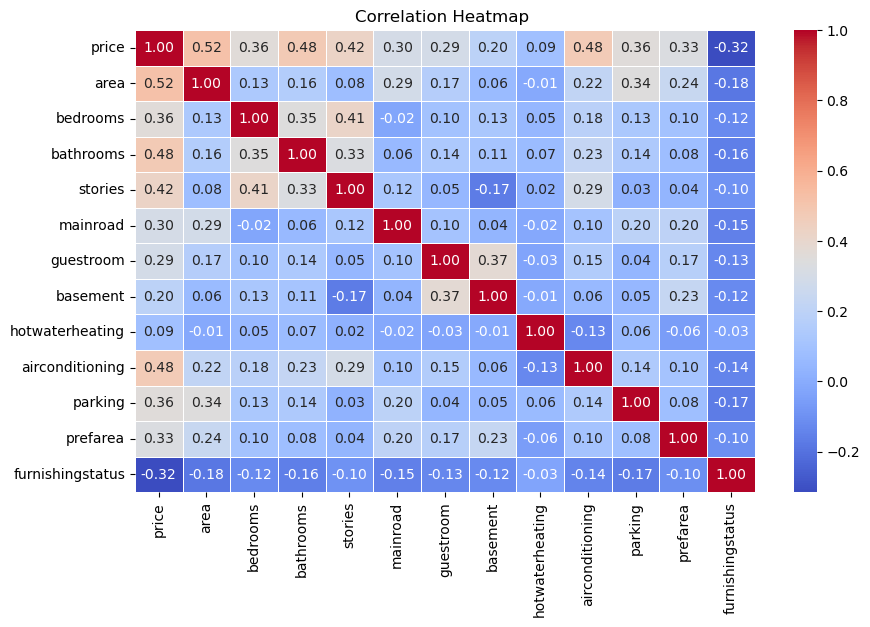

In [147]:
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap ')
plt.show()

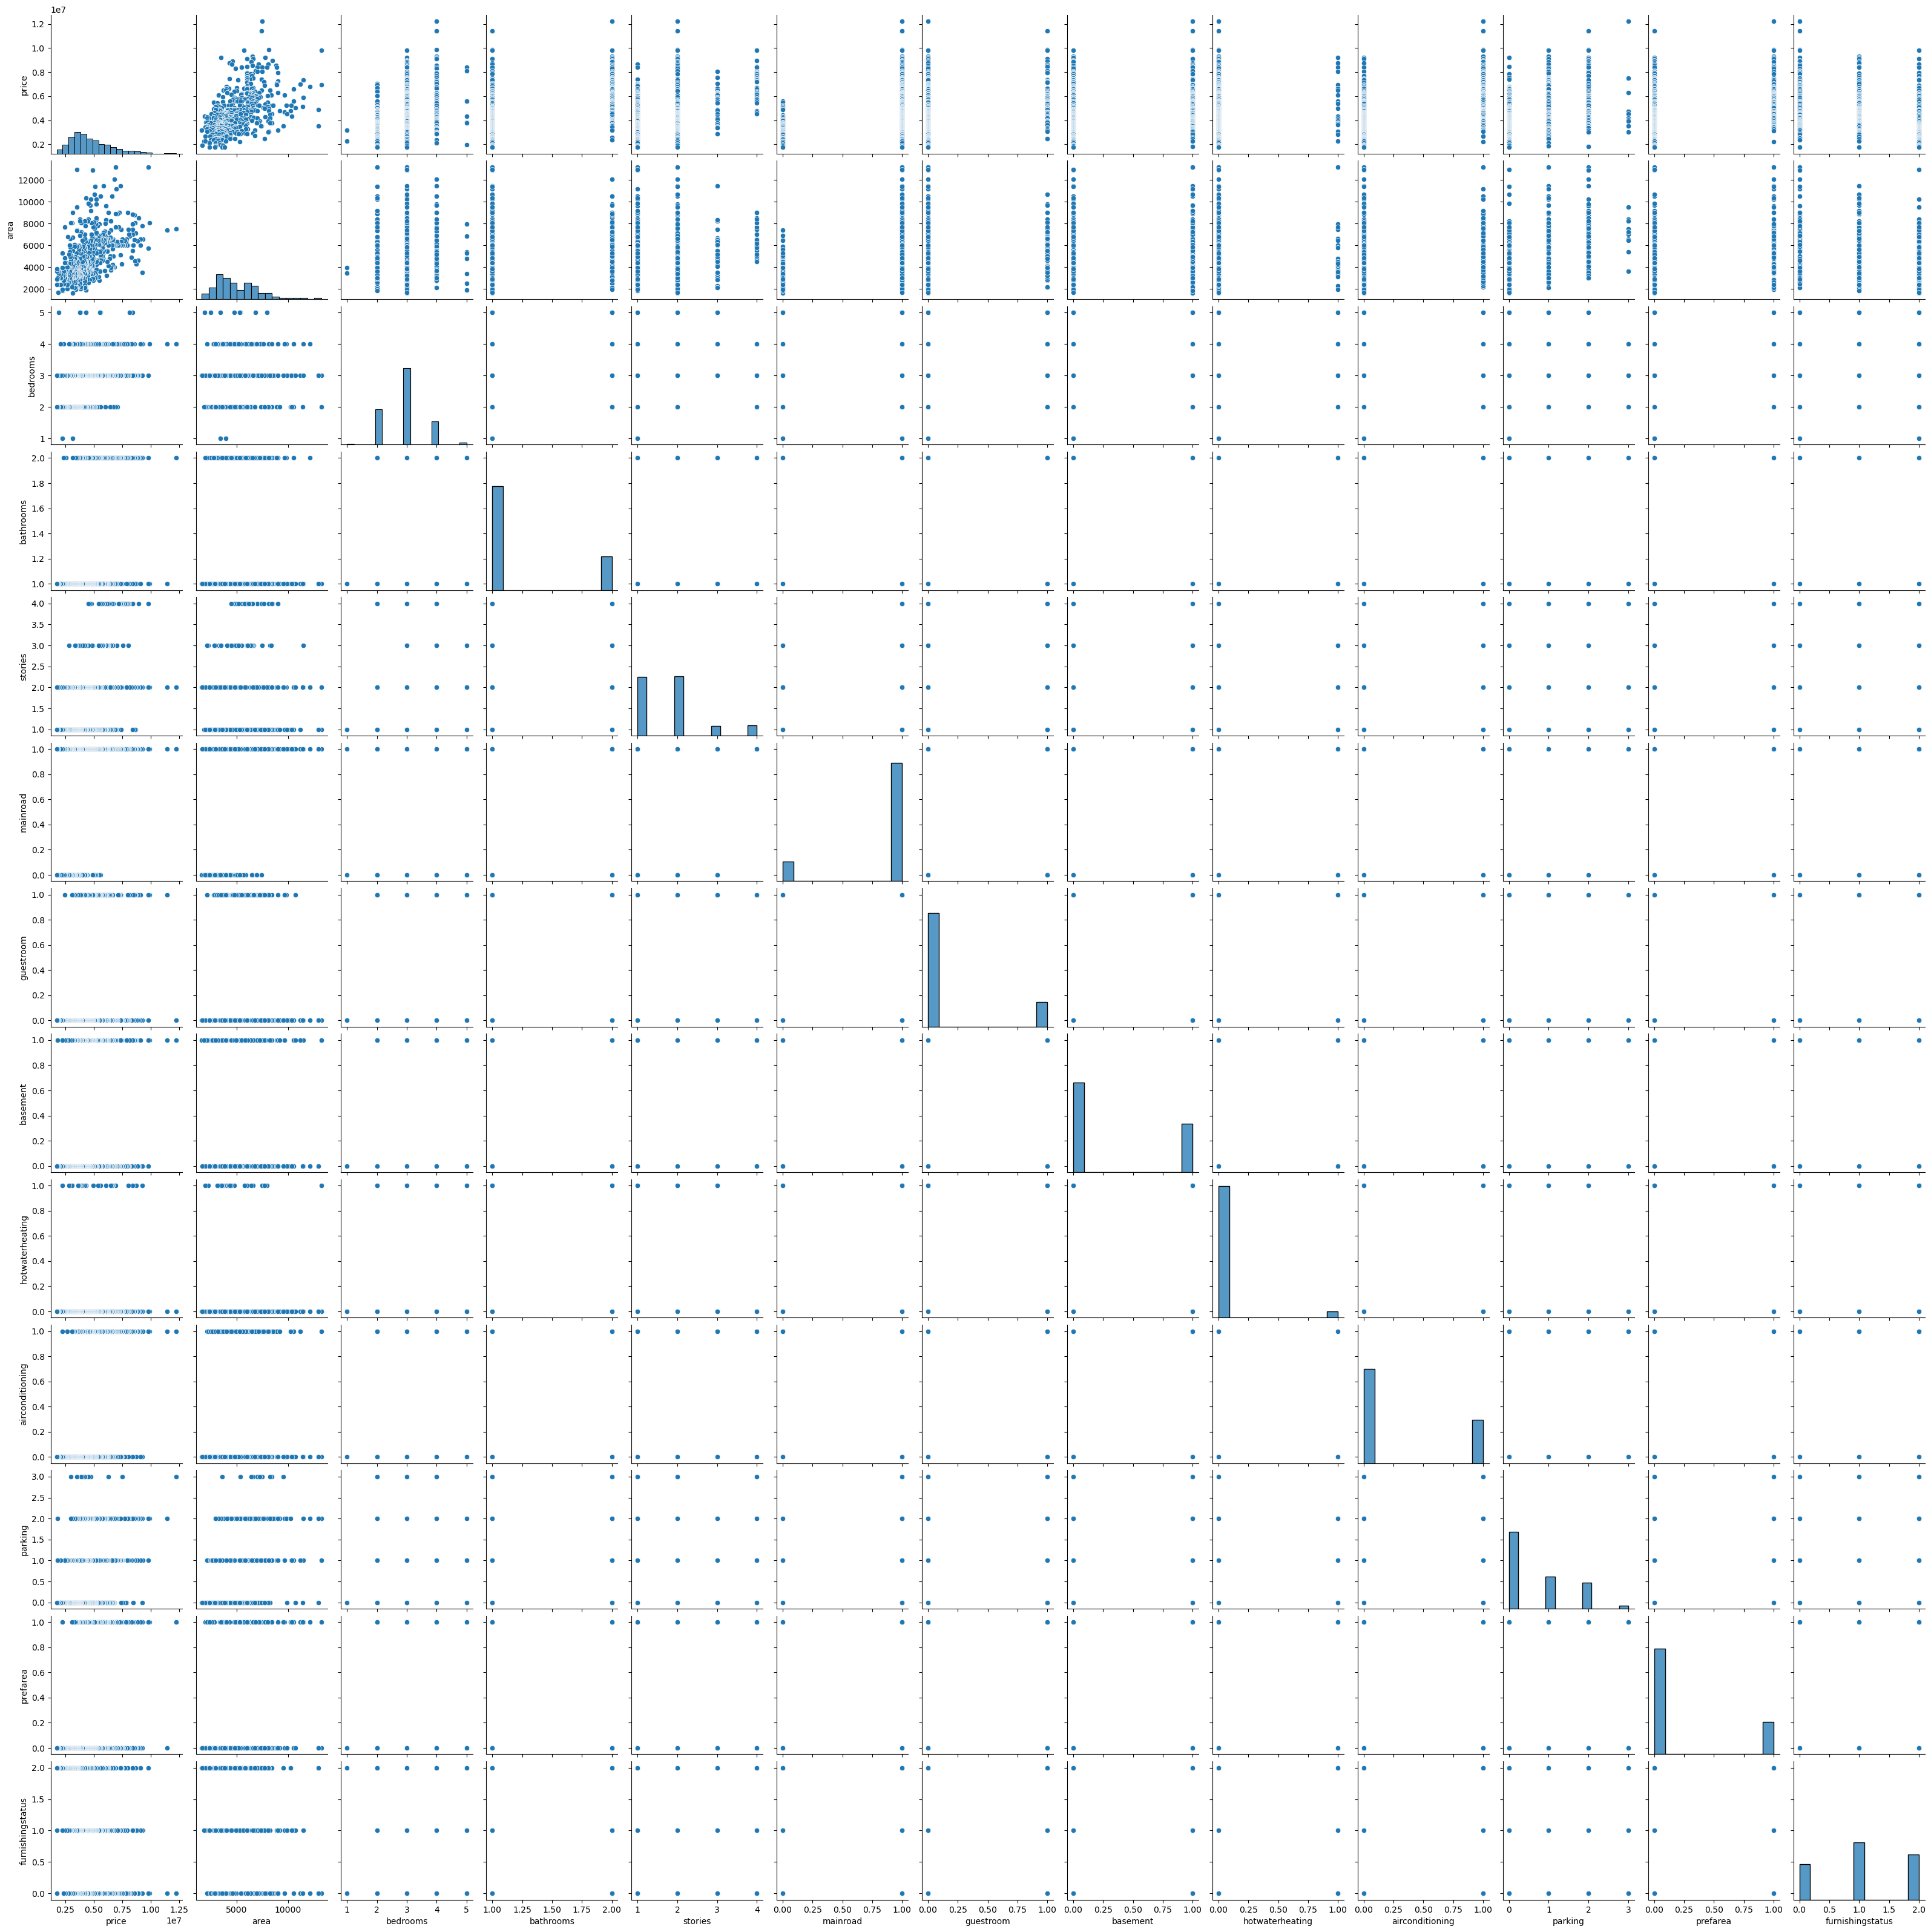

In [149]:
# Pairplot to visualize relationships between features
sns.pairplot(data)
plt.show()

## Question 1 : what are the most contributing factors to the price of a house ? 

from the heat map, we can see that there is a correlation between price and the following key features : 
- area : area has a correlation value of 0.52 with price, showing moderate positive correlation.
- bathrooms : bathrooms has a corrleation value of 0.48 with price, showing a moderate positive correlation.
- air conditioning : airconditioning has a correlation value of 0.48 with price, showing moderate positive correlation.
- stories : stories has a correlation value of 0.42 with price, showing moderate positive correlation.

## Question 2 : what impact does air conditioning has with price of a house? 

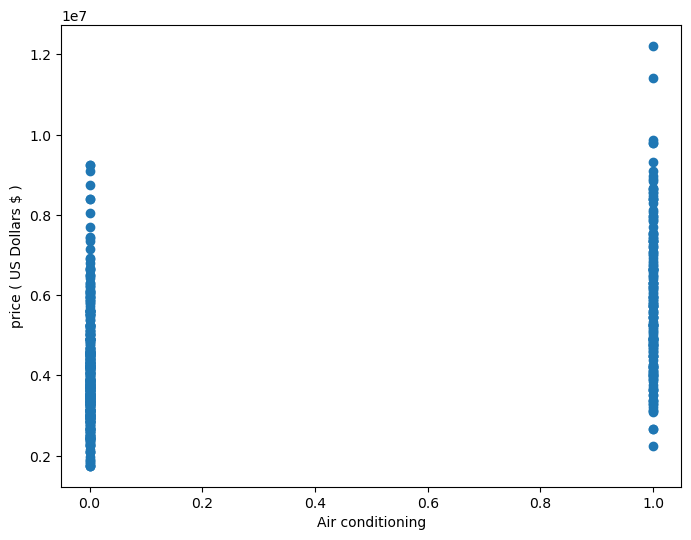

In [154]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['airconditioning'], data['price'])
ax.set_xlabel('Air conditioning')
ax.set_ylabel('price ( US Dollars $ )')
plt.show()

At both extremes, prices span a broad range, from the lowest to the highest on the plot. This indicates that the presence or absence of air conditioning, by itself, doesn't determine the price. High prices can occur with or without air conditioning.

## Question 3 : what impact does the presence of a guesroom in a house on its price?

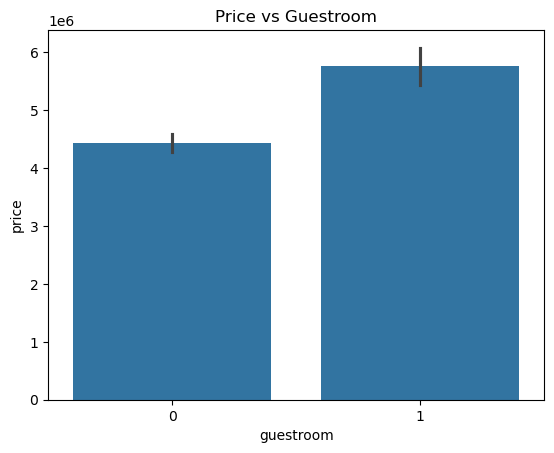

In [156]:
# Bar plot for guestroom
sns.barplot(x='guestroom', y='price', data=data)
plt.title('Price vs Guestroom')
plt.show()

The presence of a guestroom generally increases the pricing, which could be due to additional amenities, space, or services provided with guestrooms that are considered more valuable or costly. The error bars suggest variability in the price within each category, but the bars are small which indicates that the prices do not vary widely.

## Question 4 : what is the average area of houses in the dataset? 

### data['area'].describe()

inference: the average house is of 5085 square feet.

## Question 5 : Do bigger houses have more parking spots?

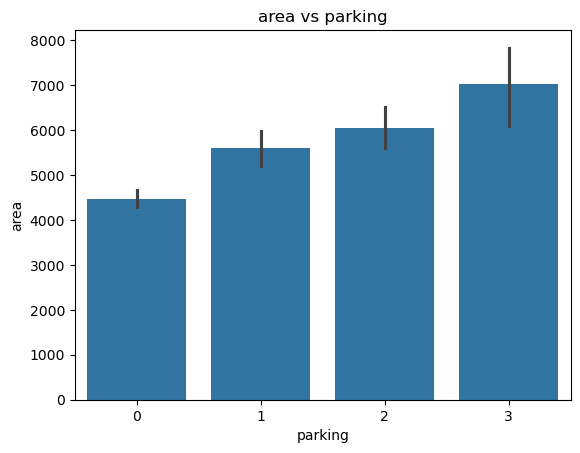

In [164]:
sns.barplot(x='parking', y='area', data=data)
plt.title('area vs parking')
plt.show()

inference: The plot shows that as the number of parking spots increases, the average area of the houses also increases. The error bar indicate that there is a variability in the data,  which suggests that while there is a difference in average prices, it may not be statistically significant.

## Question 6 : do houses with hot water heating cost more?

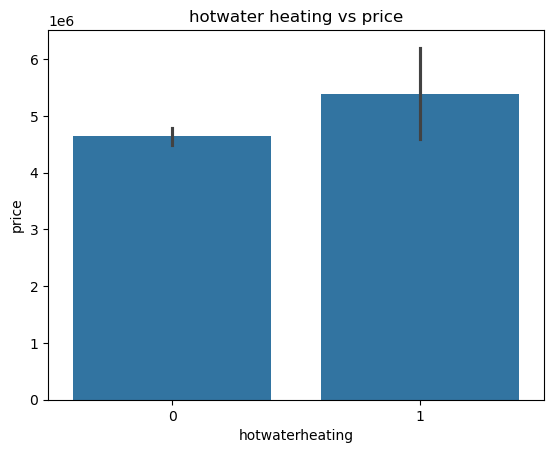

In [172]:
sns.barplot(x='hotwaterheating', y='price', data=data)
plt.title('hotwater heating vs price')
plt.show()

Inference: The plot indicates that, on average, houses with hot water heating tend to have higher prices compared to those without it. This suggests that hot water heating might be a desirable feature that adds value to a property. The error bar suggest that there is an overlap but not statistically significant.

## Question 7 : do houses with large number of bedrooms also have large number of bathrooms?

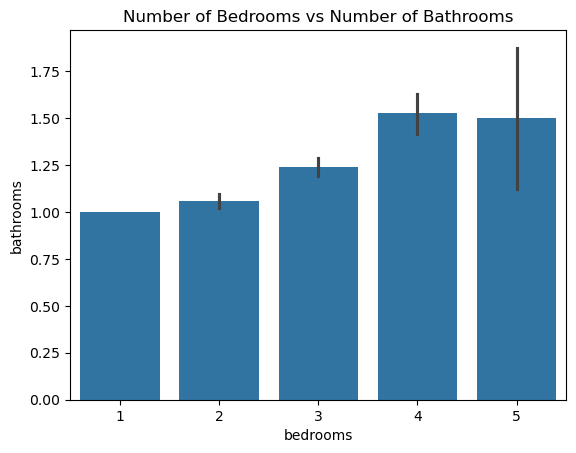

In [175]:
sns.barplot(x='bedrooms', y='bathrooms', data=data)
plt.title('Number of Bedrooms vs Number of Bathrooms')
plt.show()

inference: Houses with 1 bedroom have 1 bathroom, houses with 2 bedrooms have 1 bathroom. Houses with 3 and 4 bedrooms have more bathrooms, with the average number of bathrooms increasing to approximately 1.25 and 1.5, respectively.
For houses with 5 bedrooms, the average number of bathrooms is about 1.5, but the error bar is quite large, indicating more variability in this group.

## Question 8 : do houses that are furnished, has air conditioning cost more?

<Axes: xlabel='furnishingstatus', ylabel='price'>

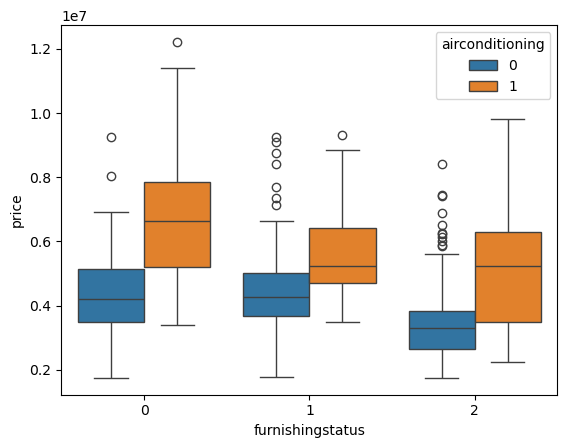

In [186]:
 sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)

Inference: Houses that are furnished and have air conditioning generally cost more. Houses that are furnished and have air conditioning generally cost more. Furnished houses tend to have the highest prices, followed by semi-furnished and unfurnished houses.

## Question 9 : How does the house being on a mainroad affect the price?

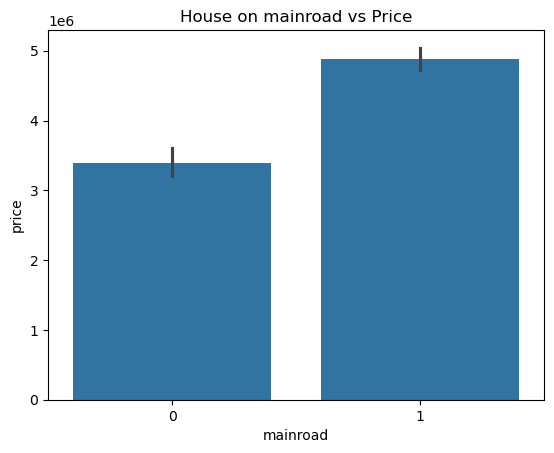

In [189]:
sns.barplot(x='mainroad', y='price', data=data)
plt.title('House on mainroad vs Price')
plt.show()

Inference: Yes, houses located on a mianroad have a higher average price compared to houses that aren’t on a mainroad. This suggest that being on a mainroad is a desireable feature, possibly due to better accessibility, visibility, or proximity to commercial areas, which increases property value.
Being on a main road could enhance a property's value for commercial potential or rental prospects, which could be factors in the higher prices observed. Additionally, properties not on main roads might exhibit more price diversity possibly due to differences in size, condition, or specific location qualities (like being in quieter, more residential areas).


## Question 10 : Do bigger houses cost more? 

<Axes: xlabel='area', ylabel='price'>

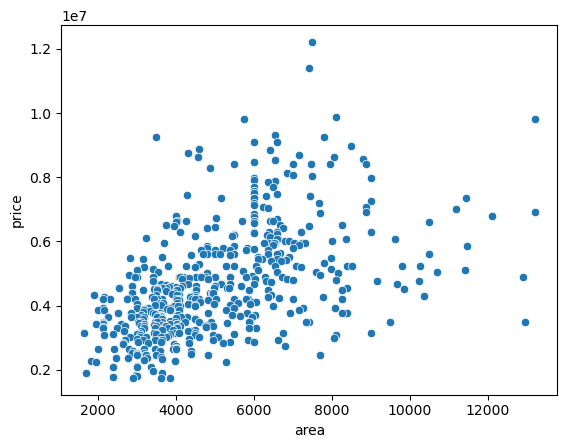

In [193]:
sns.scatterplot(y=data['price'],x=data['area'])

Inference: 
There is a positive correlation between area and price of a house though not strictly linear, there are considerable outliers still. 
There is a trend showing that houses with larger properties are prices higher but other factors must be influencing price, causing that variability 


### Question 11 : Do houses that has large number of bedrooms and bathrooms also has a larger area in square feet?

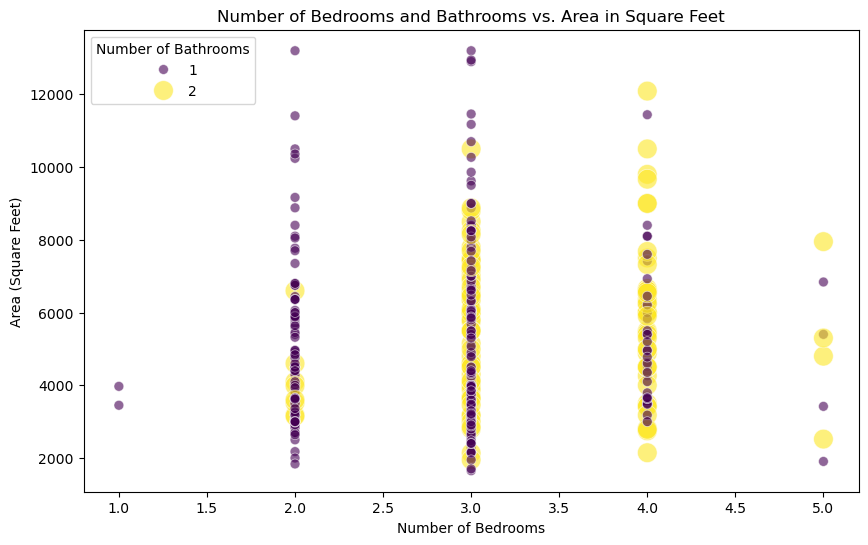

In [208]:
# Create a scatter plot with area on the y-axis, bedrooms on the x-axis, and color by the number of bathrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bedrooms', y='area', hue='bathrooms', palette='viridis', size='bathrooms', sizes=(50, 200), alpha=0.6)
plt.title('Number of Bedrooms and Bathrooms vs. Area in Square Feet')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Area (Square Feet)')
plt.legend(title='Number of Bathrooms', loc='upper left')
plt.show()

Inference: Houses with more bathrooms generally have larger areas.
This is particularly evident in houses with 3 or more bedrooms, where larger houses are more likely to have 2 bathrooms.
There is a positive correlation between number of bedrooms and house ares, indicating that large houses tend to have more bedrooms. 
Also there is a positive correlation between number of bathrooms and the house area, large houses tend to have more bathrooms. 
this indicates that when houses increase in size, they increase in number of bedrooms and bathrooms as well, but there is an overlap, There are some extreme outliers with very large areas, especially among houses with 4 bedrooms.

## Question 12 : Does the presence of a basement affects the price?

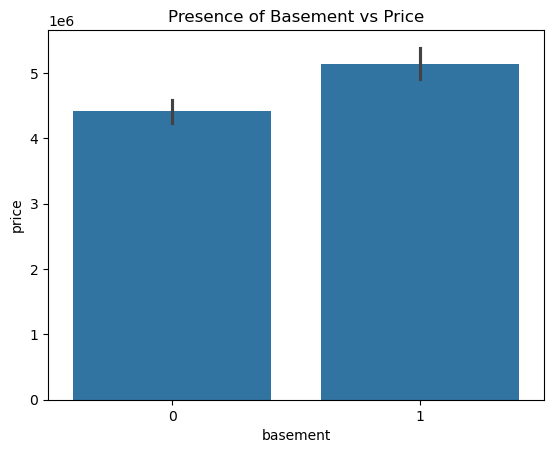

In [213]:
sns.barplot(x='basement', y='price', data=data)
plt.title('Presence of Basement vs Price')
plt.show()

Inference: Houses with basements have a slightly higher prices, but  the difference is not large to be considered a primary factor influencing the price. 